In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import Fit.utils
from Fit import LocalTemplateFit, GlobalTemplateFit
import scipy.optimize

In [58]:
phase_space = (4,2)
nbins = 20
signal, bkgd0, bkgd1, bins = Fit.utils.fake_templates(nbins, shape=phase_space)
total = signal + bkgd0 + bkgd1

cov, inv = Fit.utils.cov_inv(Fit.utils.poisson_multiverse(total.flatten(), nuniverses=100))

fit = GlobalTemplateFit(cov, (signal, bkgd0, bkgd1))

mock_scales = np.ones((3,*phase_space))
mock_scales[0] = np.linspace(1, 2, np.prod(phase_space)).reshape(mock_scales[0].shape)
mock_scales[1] = (np.linspace(0.9, 1.2, np.prod(phase_space)))[::-1].reshape(mock_scales[1].shape)

mock_data = np.random.poisson(fit.U(mock_scales.flatten()))

In [59]:
mock_data.shape

(160,)

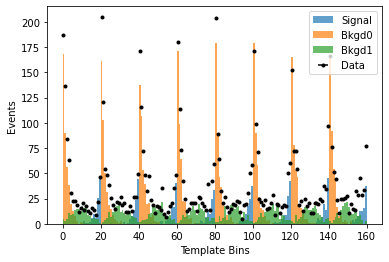

In [60]:

plt.close()
Fit.utils.plot_templates((signal.flatten(), 
                          bkgd0.flatten(),
                          bkgd1.flatten()),
                         ('Signal', 
                          'Bkgd0', 
                          'Bkgd1'), 
                         np.linspace(0, len(signal.flatten()), len(signal.flatten())+1),
                        data=mock_data)

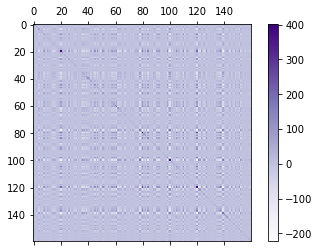

In [61]:
Fit.utils.plot_mat(cov)

In [69]:
fit.chisq(np.ones((3, *phase_space)).flatten(), np.random.poisson(total.flatten()))

1.2691208292558782e+17